In [1]:
!pip install opencv-python

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())


/content


In [30]:
!ls /content/

 s2.png   sample_data  'Screenshot (31).png'   test.jfif   yoloobject.jpeg


In [31]:
image = cv2.imread('/content/test.jfif')
type(image)

numpy.ndarray

In [32]:
image.shape

(2000, 3000, 3)

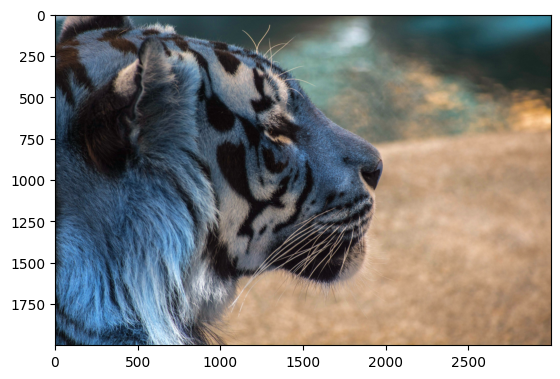

In [33]:
plt.imshow(image)

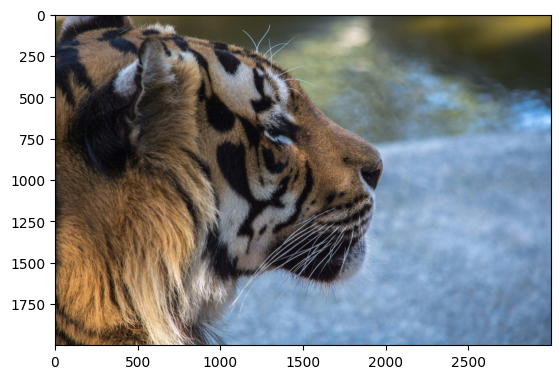

In [34]:
new_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(new_image)

In [36]:
"""splitting the image into channels"""
r, g, b = cv2.split(new_image)
print('r', r.shape)
print('g', g.shape)
print('b', b.shape)

r (2000, 3000)
g (2000, 3000)
b (2000, 3000)


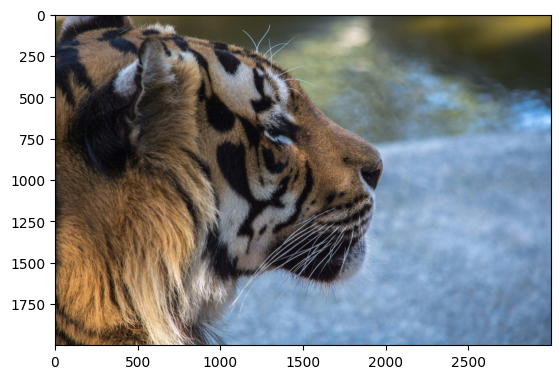

In [37]:
"""merging the channels"""
new_image = cv2.merge((r,g,b))
plt.imshow(new_image)

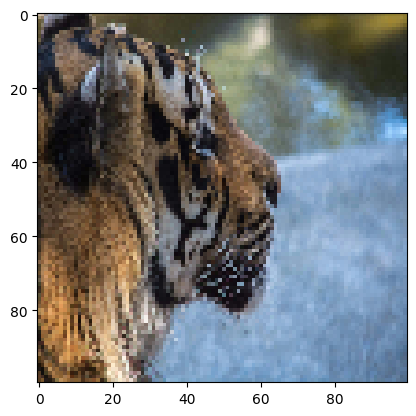

In [38]:
"""resizing the image"""
new_image = cv2.resize(new_image, (100,100))
plt.imshow(new_image)

In [39]:
new_image.shape

(100, 100, 3)

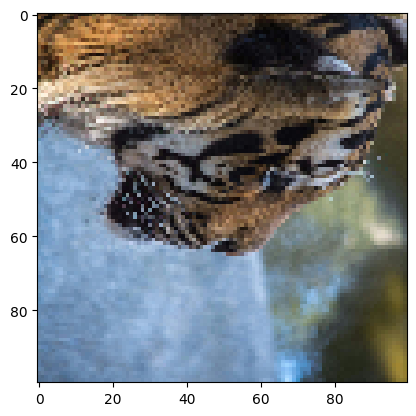

In [40]:
"""rotationg the image"""
new_image = cv2.rotate(new_image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(new_image)

In [42]:
yolo = cv2.dnn.readNet("/content/yolov3-tiny.weights", "/content/yolov3-tiny.cfg")

In [43]:
classes = []

with open("/content/coco.names.names", "r") as f:
  classes = f.read().splitlines()

In [46]:
len(classes)

80

In [102]:
img = cv2.imread("/content/test2.jfif")
blop = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)

In [103]:
blop.shape

(1, 3, 320, 320)

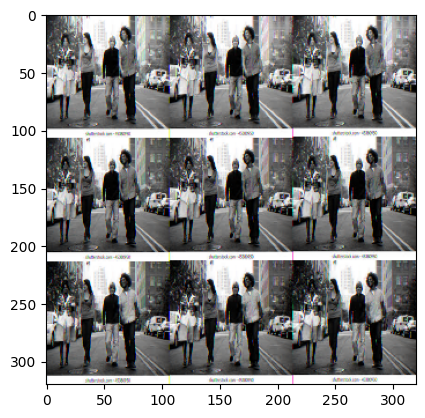

In [105]:
i = blop[0].reshape(320,320,3)
plt.imshow(i)

In [106]:
yolo.setInput(blop)

In [112]:
output_layers_names = yolo.getUnconnectedOutLayersNames()
layerOutputs = yolo.forward(output_layers_names)

In [120]:
boxes = []
confidences = []
class_ids = []
width = 320
height = 320
for output in layerOutputs:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)
      print(x,y,w,h)

      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)





87 31 54 243
143 21 40 269
190 29 52 255
20 70 69 215
140 40 48 245
186 39 55 246


In [121]:
len(boxes)

6

In [122]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

In [124]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0,255, size=(len(boxes),3))



In [125]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]

  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],2))
  color = colors[i]

  cv2.rectangle(img, (x,y), (x+w, y+h), color, 1)
  cv2.putText(img, label + " " + confi, (x,y+20), font, 2, (255,255,255), 1)

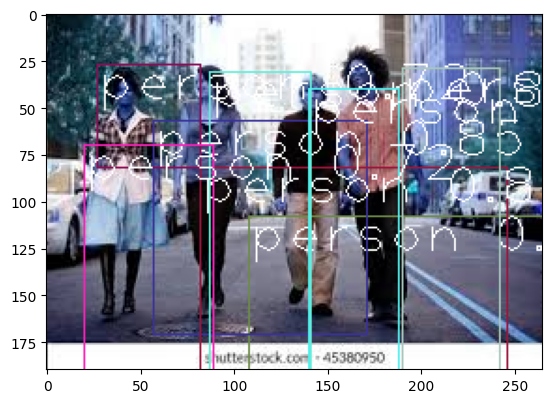

In [126]:
plt.imshow(img)